# Setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import urllib2
import sklearn.mixture as mixture
import sklearn.preprocessing as preprocess

%matplotlib inline

sample_size = 1000
np.random.seed(1)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:] 

csv_rand = None
for i in range (1, sample_size):
	#Randomly sample from dataset
	a = np.random.permutation(np.arange(csv.shape[0]))[:100]
	csv_rand_sample = csv[a]

	# Normalize
	mean_unmask = np.mean(csv_rand_sample[:,3])
	std_unmask = np.std(csv_rand_sample[:,3])
	csv_rand_sample[:,3] = (csv_rand_sample[:,3]-mean_unmask)/std_unmask

	#Stack matrix
	if i == 1:
		csv_rand = csv_rand_sample
	else:
		csv_rand = np.dstack((csv_rand,csv_rand_sample))

#Average across random samples
csv_rand = np.mean(csv_rand,axis=2)

# Independence Assumption

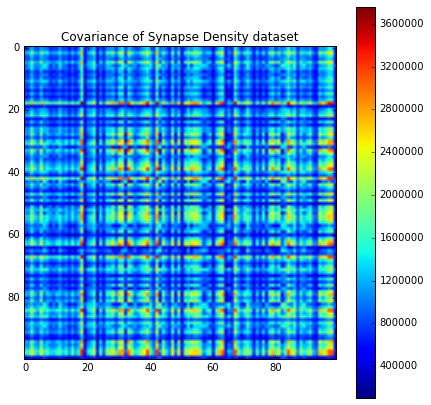

1404.48510738
1411.53069664


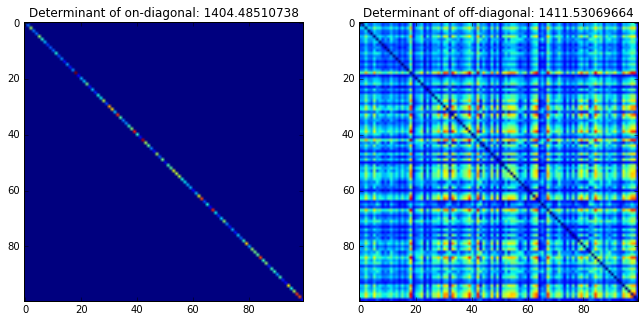

Ratio of on and off-diagonal determinants: 0.995008546908


In [4]:
#Independence Assumption
covar = np.cov(csv_rand_sample)

plt.figure(figsize=(7,7))
plt.imshow(covar)
plt.title('Covariance of Synapse Density dataset')
plt.colorbar()
plt.show()

diag = covar.diagonal()*np.eye(covar.shape[0])
hollow = covar-diag
d_det = np.linalg.slogdet(diag)[1]
h_det = np.linalg.slogdet(hollow)[1]
print d_det
print h_det

plt.figure(figsize=(11,8))
plt.subplot(121)
plt.imshow(diag)
plt.clim([0, np.max(covar)])
plt.title('Determinant of on-diagonal: ' + str(d_det))
plt.subplot(122)
plt.imshow(hollow)
plt.clim([0, np.max(covar)])
plt.title('Determinant of off-diagonal: ' + str(h_det))
plt.show()

print "Ratio of on and off-diagonal determinants: " + str(d_det/h_det)

From the above, we conclude that the assumption that the graphs were independent is true. This is because the off-diagonal components of the covariance are not significant in the cross-graph covariance matrix, and the ratio of on and off-diagonal determinants is very high.

# Identical Assumption

Fitting and evaluating model with 1 clusters.
Fitting and evaluating model with 2 clusters.
Fitting and evaluating model with 3 clusters.
Fitting and evaluating model with 4 clusters.
Fitting and evaluating model with 5 clusters.
Fitting and evaluating model with 6 clusters.
Fitting and evaluating model with 7 clusters.
Fitting and evaluating model with 8 clusters.
Fitting and evaluating model with 9 clusters.
Fitting and evaluating model with 10 clusters.
Fitting and evaluating model with 11 clusters.
Fitting and evaluating model with 12 clusters.
Fitting and evaluating model with 13 clusters.
Fitting and evaluating model with 14 clusters.
[ 5185386.8982015   4907607.84258505  4807732.12529995  4783802.55709544
  4773128.27908343  4767387.61874779  4748027.19584671  4745601.98571248
  4741870.93939538  4741286.6501353   4737740.27824445  4583998.62147423
  4576136.76480289  4581032.44309987]


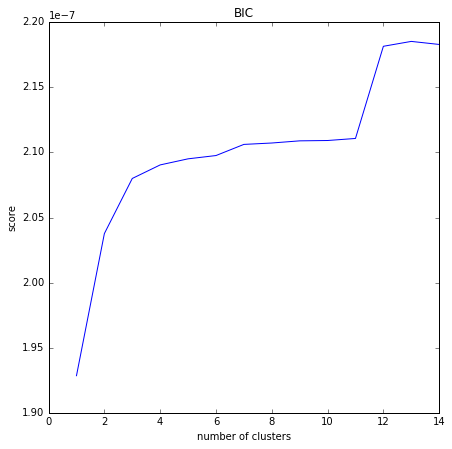

In [6]:
max_clusters = 15
bic = np.array([])
i = np.array(range(1, max_clusters))
for idx in range(1, max_clusters):
    print "Fitting and evaluating model with " + str(idx) + " clusters."
    gmm = mixture.GMM(n_components=idx,n_iter=1000,covariance_type='diag')
    gmm.fit(csv)
    bic = np.append(bic, gmm.bic(csv))
print bic
plt.figure(figsize=(7,7))
plt.plot(i, 1.0/bic)
plt.title('BIC')
plt.ylabel('score')
plt.xlabel('number of clusters')
plt.show()

From the above we observe that, since the elbow of the bic curve lies at 4, that our data may not have been sampled identically from one distribution. Thus, our assumption is true.

# Conditional Dependence Assumption

Assuming that unmasked is conditioned on position (x,y,z) and number of synapses at that position, our random forest regression performs extremely well with a R^2 value of 0.89 (+/- 0.01). The fact that this regression has a very high R^2 value for our dataset validates the assumption of a relationship between position, number of synapses, and unmasked value.